In [7]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 10:52:40.684630: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [8]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [9]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [10]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [11]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [12]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


# Split df into endurance and the rest

In [13]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
with open(data_dir + 'in_situ_obs_with_ascat_params_9000_images.pickle', 'rb') as handle:
    ascat_dict = pickle.load(handle)

In [14]:
lat_endurance = ascat_dict['Endurance_8']['lat'][0]
lat_endurance

44.6393

In [15]:
lon_endurance = ascat_dict['Endurance_8']['lon'][0]
lon_endurance

-124.304

In [16]:
df['lat']

0        44.6393
1        44.6393
2        44.6393
3        44.6393
4        44.6393
          ...   
10195    59.9337
10196    59.9337
10197    59.9337
10198    59.9337
10199    59.9337
Name: lat, Length: 10200, dtype: float64

In [17]:
endurance_df = df.loc[((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.018966,-0.594677,358.100003,2471.372944,1016.386556,1017.603003,6.516033,6.581048,79.929251,79.539752,...,55.719997,101.059998,146.349991,40.459999,30.599998,40.480000,20190606T172400Z,20190606T190258.125000Z,3.139910,-0.480648
9239,0.117299,-0.672016,306.710004,2470.012630,1016.904381,1018.113492,6.858100,6.967579,75.178500,74.175803,...,-25.459999,-70.239998,-115.000000,47.000000,36.430000,47.009998,20190606T183900Z,20190606T201758.125000Z,4.053570,0.802673
9240,-0.202790,-0.338547,304.284998,2469.199633,1017.037615,1018.248502,7.083076,7.198158,79.840050,78.977536,...,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,20190607T030900Z,20190607T045058.125000Z,4.663450,0.584319
9241,-0.158690,-0.265731,345.339999,2469.292713,1017.281224,1018.491504,7.088302,7.190713,78.672100,77.872570,...,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,20190607T030900Z,20190607T045058.125000Z,4.481067,-0.841521


In [18]:
not_endurance_df = df.loc[~((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
not_endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
548,0.113976,-0.135600,368.500055,2445.270174,1021.901288,1023.069957,11.962166,12.377113,71.661124,69.656357,...,118.930000,73.939995,29.029999,53.959999,42.869999,53.899998,20130529T220000Z,20130529T234158.125000Z,-6.597255,-1.833089
549,-0.014471,-0.120929,362.121919,2445.131856,1022.891239,1024.060199,12.833504,13.200377,76.160202,74.471500,...,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,20130530T113600Z,20130530T131458.125000Z,-6.461136,-2.079781
550,-0.037062,-0.060154,409.239282,2444.968851,1022.957700,1024.125722,13.042352,13.404786,76.311600,74.620695,...,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,20130530T113600Z,20130530T131458.125000Z,-6.537496,-1.926029
551,0.102161,-0.051391,369.036164,2445.191700,1022.204719,1023.373172,12.028556,12.450769,71.544346,69.485583,...,-146.199997,-100.610001,-54.930000,54.139999,42.869999,54.110001,20130531T230000Z,20130601T004158.125000Z,-6.339404,-3.582880
552,0.043799,-0.270238,363.438272,2444.951085,1021.556901,1022.724500,12.463280,12.850843,73.969745,72.166180,...,-29.179998,-74.110001,-119.119995,54.509998,43.450001,54.579998,20130601T123300Z,20130601T141458.125000Z,-4.966591,-3.867437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


df = df.sample(frac = 1, random_state=77)
df     

In [19]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

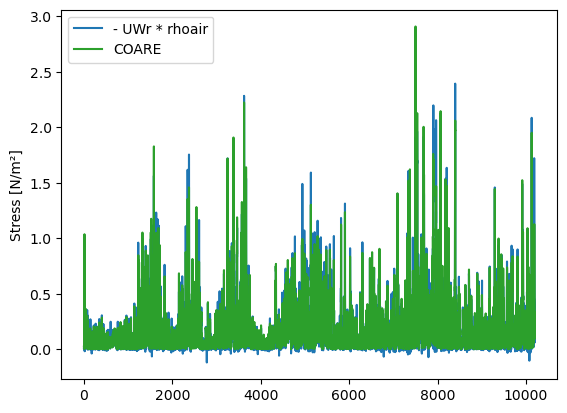

In [20]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

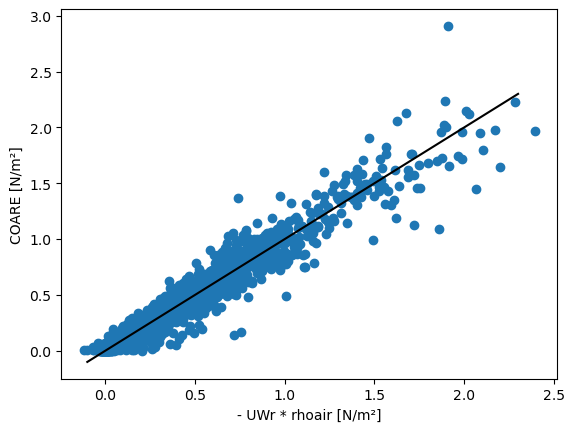

In [21]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

# Remove some extreme values

In [22]:
endurance_df = endurance_df[( (endurance_df['UWr'] >= -2) & (endurance_df['UWr'] <= 2) )]   
not_endurance_df = not_endurance_df[( (not_endurance_df['UWr'] >= -2) & (not_endurance_df['UWr'] <= 2) )]   

# Prepare features and labels

In [23]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [24]:
x_train = not_endurance_df[predictor_variables]
x_train

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
548,-21.530363,-17.361044,-22.839540,118.930000,73.939995,29.029999,53.959999,42.869999,53.899998,-6.597255,-1.833089
549,-21.573780,-19.767637,-26.680492,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,-6.461136,-2.079781
550,-21.573780,-19.767637,-26.680492,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,-6.537496,-1.926029
551,-20.725578,-15.794853,-21.418365,-146.199997,-100.610001,-54.930000,54.139999,42.869999,54.110001,-6.339404,-3.582880
552,-25.262472,-19.059395,-21.421995,-29.179998,-74.110001,-119.119995,54.509998,43.450001,54.579998,-4.966591,-3.867437
...,...,...,...,...,...,...,...,...,...,...,...
10195,-17.096880,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,1.487218,11.194811
10196,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,4.111861,8.730479
10197,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,5.372468,8.590097
10198,-18.504557,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,8.845551,7.408846


In [25]:
x_test = endurance_df[predictor_variables]
x_test

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
0,-18.536940,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,1.125562,-5.806792
1,-18.536940,-18.566280,-18.004992,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,0.063789,-5.914661
2,-17.510736,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,-0.424115,1.525726
3,-17.510736,-15.381634,-17.913292,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,0.056819,2.623381
4,-17.351988,-10.832646,-15.996907,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...
9238,-10.249539,-9.383224,-10.079884,55.719997,101.059998,146.349991,40.459999,30.599998,40.480000,3.139910,-0.480648
9239,-21.621683,-17.251101,-21.675631,-25.459999,-70.239998,-115.000000,47.000000,36.430000,47.009998,4.053570,0.802673
9240,-11.873994,-10.223776,-11.784093,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,4.663450,0.584319
9241,-11.873994,-10.223776,-11.784093,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,4.481067,-0.841521


In [26]:
y_train = - not_endurance_df['UWr'] * not_endurance_df['rhoair']
y_train

548      0.079656
549      0.077918
550      0.053868
551      0.080757
552      0.070844
           ...   
10195    0.154419
10196    0.061098
10197    0.061890
10198    0.369650
10199    0.239781
Length: 8341, dtype: float64

In [27]:
y_test = - endurance_df['UWr'] * endurance_df['rhoair']
y_test

0       0.010954
1       0.022715
2       0.026186
3       0.025424
4       0.037788
          ...   
9238    0.001580
9239    0.023102
9240    0.110556
9241    0.045116
9242    0.015220
Length: 1859, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [28]:
c_train = not_endurance_df['stress']
c_test = endurance_df['stress']

In [29]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [61]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [62]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [63]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-01 10:22:55.559492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-01 10:22:55.576521: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2794920000 Hz


Epoch 1/500
183/183 [==============================] - 1s 5ms/step - loss: 1.9752 - mean_absolute_error: 0.7967 - val_loss: 2.2912 - val_mean_absolute_error: 0.7588
Epoch 2/500
183/183 [==============================] - 0s 707us/step - loss: 1.6177 - mean_absolute_error: 0.6210 - val_loss: 1.9936 - val_mean_absolute_error: 0.6704
Epoch 3/500
183/183 [==============================] - 0s 715us/step - loss: 1.0916 - mean_absolute_error: 0.5206 - val_loss: 1.7976 - val_mean_absolute_error: 0.6237
Epoch 4/500
183/183 [==============================] - 0s 701us/step - loss: 1.1368 - mean_absolute_error: 0.4897 - val_loss: 1.6665 - val_mean_absolute_error: 0.6014
Epoch 5/500
183/183 [==============================] - 0s 643us/step - loss: 0.9965 - mean_absolute_error: 0.4723 - val_loss: 1.5614 - val_mean_absolute_error: 0.5886
Epoch 6/500
183/183 [==============================] - 0s 661us/step - loss: 1.1538 - mean_absolute_error: 0.4860 - val_loss: 1.4785 - val_mean_absolute_error: 0.5794


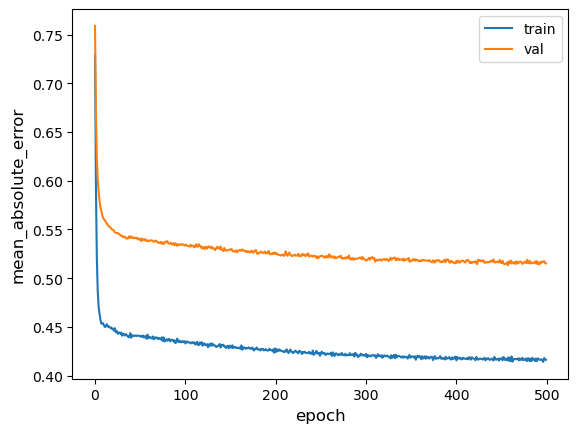

59/59 [==============================] - 0s 326us/step - loss: 0.9254 - mean_absolute_error: 0.7708
Test accuracy 0.7707807421684265
Test loss 0.9254176616668701


In [64]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [65]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [66]:
np.mean(y_test)

0.08317852201885496

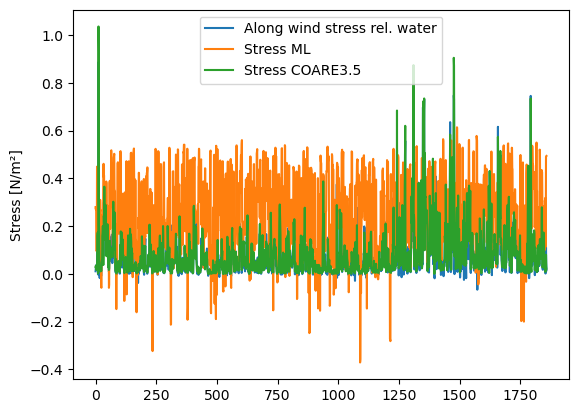

In [67]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

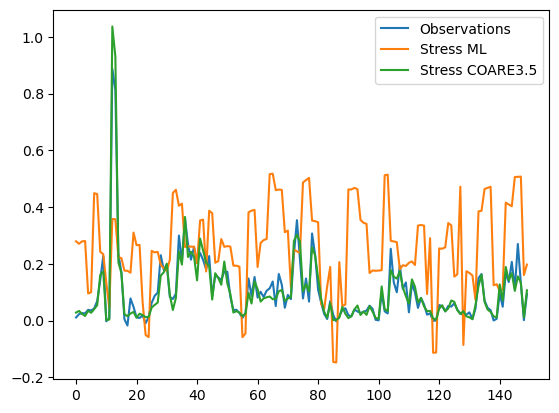

In [68]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

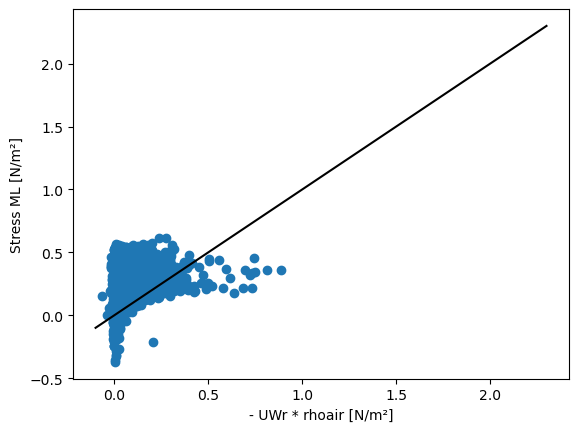

In [69]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

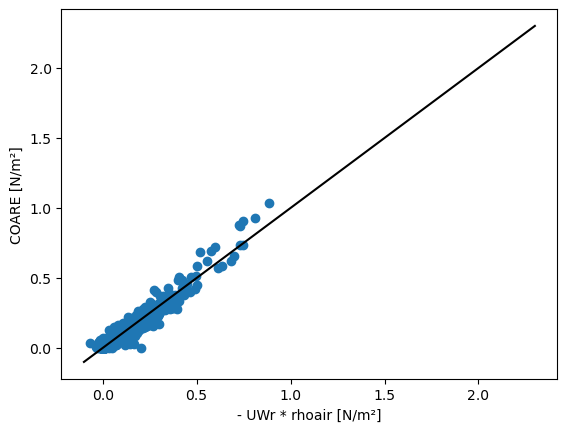

In [70]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [71]:
rmse(y_test.values, y_test_pred)

0.2545729368413197

In [72]:
rmse(y_test.values, c_test)

0.02575765121402028

## Correlation

In [73]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.17931177],
       [0.17931177, 1.        ]])

In [74]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

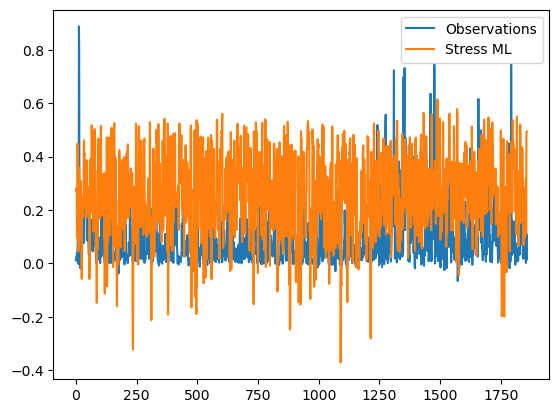

In [75]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [76]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.17931177],
       [0.17931177, 1.        ]])

In [77]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [78]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2545729368413197

# Other experiments

In [79]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [80]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [81]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
183/183 [==============================] - 1s 1ms/step - loss: 0.7728 - mean_absolute_error: 0.5738 - val_loss: 1.2060 - val_mean_absolute_error: 0.6327
Epoch 2/500
183/183 [==============================] - 0s 806us/step - loss: 0.5518 - mean_absolute_error: 0.4711 - val_loss: 1.0953 - val_mean_absolute_error: 0.5725
Epoch 3/500
183/183 [==============================] - 0s 779us/step - loss: 0.4485 - mean_absolute_error: 0.4167 - val_loss: 0.9790 - val_mean_absolute_error: 0.5420
Epoch 4/500
183/183 [==============================] - 0s 800us/step - loss: 0.4254 - mean_absolute_error: 0.4051 - val_loss: 0.9044 - val_mean_absolute_error: 0.5141
Epoch 5/500
183/183 [==============================] - 0s 744us/step - loss: 0.3653 - mean_absolute_error: 0.3656 - val_loss: 0.8445 - val_mean_absolute_error: 0.4876
Epoch 6/500
183/183 [==============================] - 0s 797us/step - loss: 0.3633 - mean_absolute_error: 0.3631 - val_loss: 0.8133 - val_mean_absolute_error: 0.4826


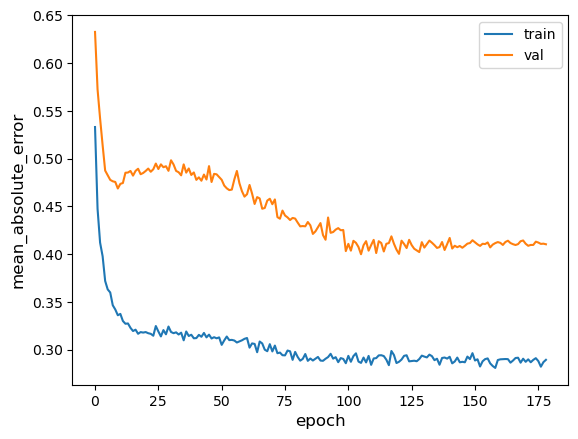

59/59 [==============================] - 0s 363us/step - loss: 4.6634 - mean_absolute_error: 1.4334
Test accuracy 1.4333609342575073
Test loss 4.663435459136963


In [82]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [83]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

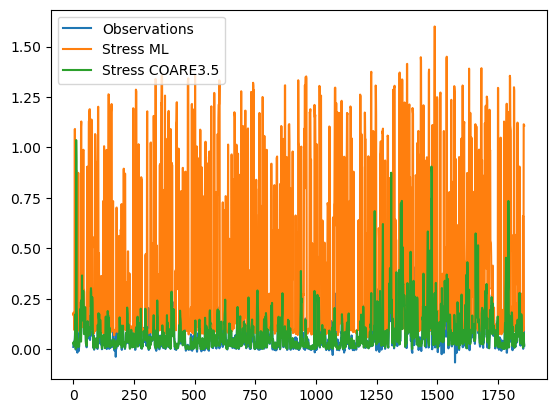

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

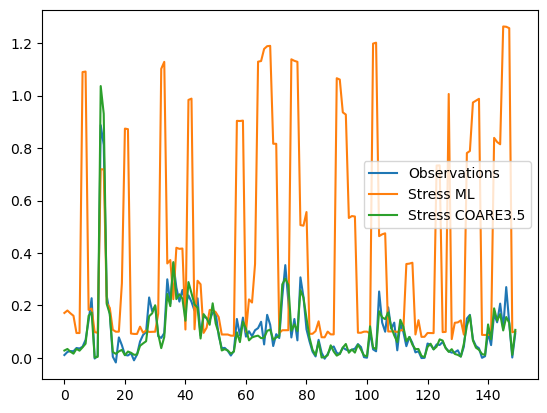

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [86]:
rmse(y_test.values, y_test_pred)

0.5515322432564427

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.08434981],
       [0.08434981, 1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [89]:
y_test.values.shape

(1859,)

In [90]:
y_test_pred[:, 0].shape

(1859,)

In [91]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [92]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.01095362, 0.02271456, 0.026186  , ..., 0.11055603, 0.04511604,
       0.0152197 ])

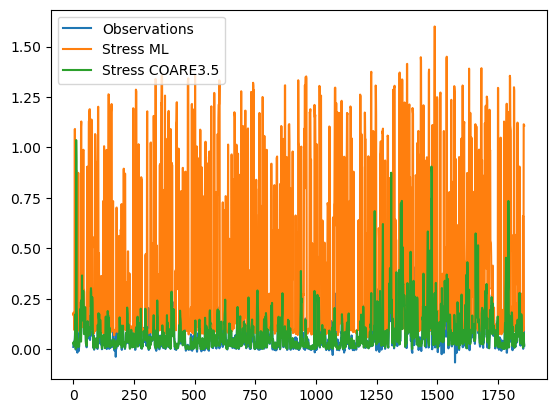

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

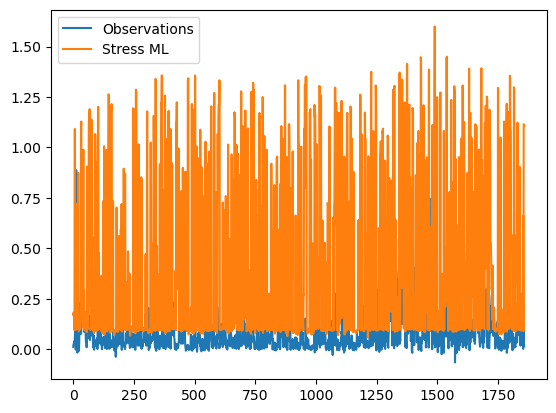

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [95]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [96]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.5515322432564427

Text(0, 0.5, 'Stress ML [N/m²]')

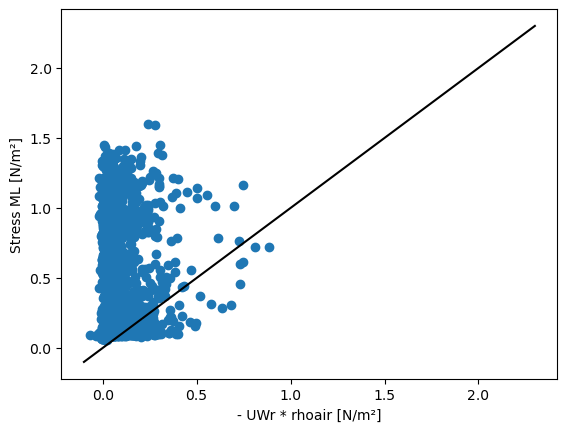

In [97]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [98]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [99]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [100]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
92/92 [==============================] - 1s 2ms/step - loss: 3.1405 - mean_absolute_error: 1.3192 - val_loss: 2.0141 - val_mean_absolute_error: 0.7489
Epoch 2/500
92/92 [==============================] - 0s 1ms/step - loss: 1.6195 - mean_absolute_error: 0.9761 - val_loss: 1.8686 - val_mean_absolute_error: 0.6808
Epoch 3/500
92/92 [==============================] - 0s 1ms/step - loss: 1.1451 - mean_absolute_error: 0.8000 - val_loss: 1.7238 - val_mean_absolute_error: 0.6368
Epoch 4/500
92/92 [==============================] - 0s 1ms/step - loss: 1.0448 - mean_absolute_error: 0.7236 - val_loss: 1.5310 - val_mean_absolute_error: 0.6049
Epoch 5/500
92/92 [==============================] - 0s 1ms/step - loss: 0.6811 - mean_absolute_error: 0.6016 - val_loss: 1.3420 - val_mean_absolute_error: 0.5847
Epoch 6/500
92/92 [==============================] - 0s 1ms/step - loss: 0.7219 - mean_absolute_error: 0.6042 - val_loss: 1.2123 - val_mean_absolute_error: 0.5646
Epoch 7/500
92/92 [===

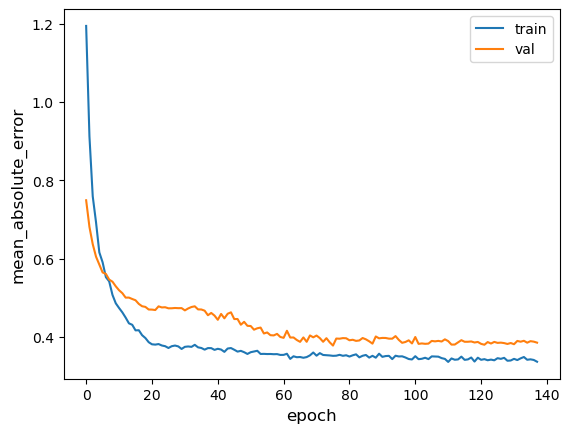

59/59 [==============================] - 0s 417us/step - loss: 3.6404 - mean_absolute_error: 1.3068
Test accuracy 1.306809425354004
Test loss 3.6404025554656982


In [101]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [102]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [103]:
rmse(y_test.values, y_test_pred)

0.48875380431097576

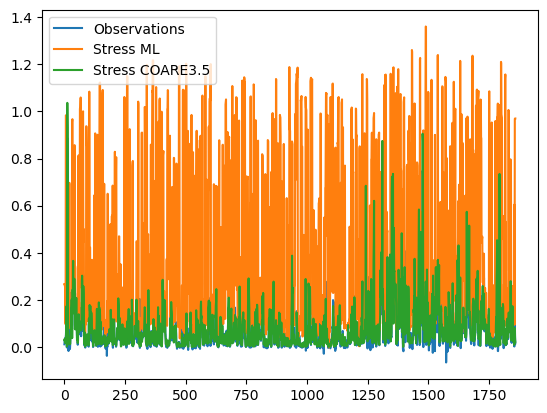

In [104]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

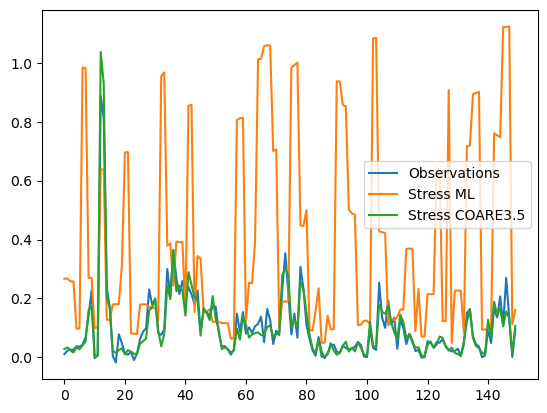

In [105]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

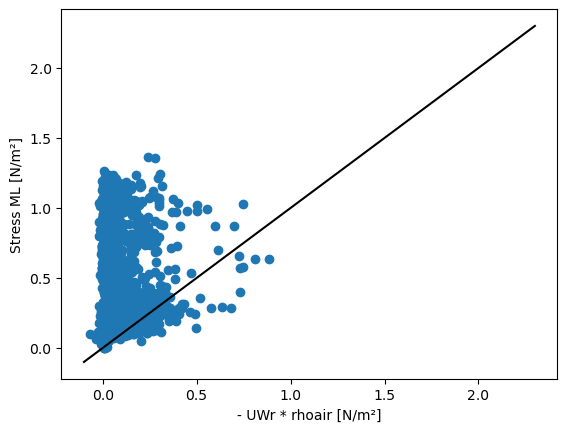

In [106]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [107]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.09727619],
       [0.09727619, 1.        ]])

In [108]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

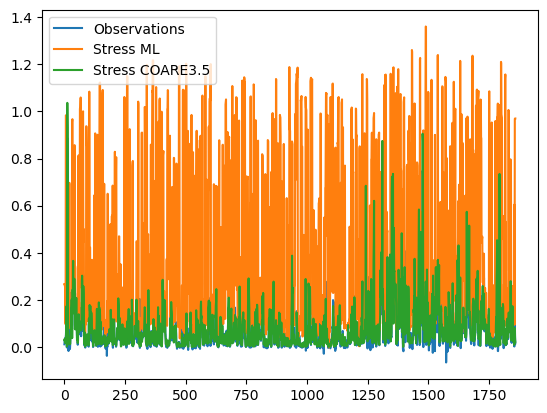

In [109]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

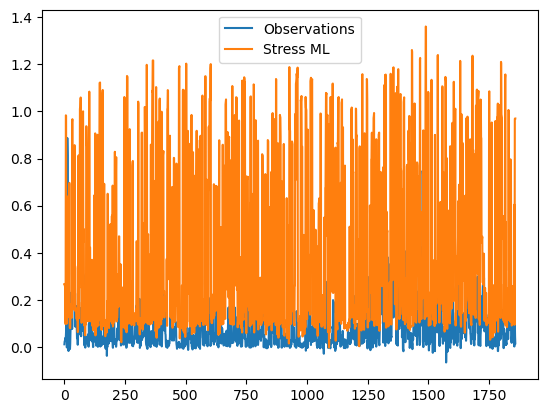

In [110]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [111]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [112]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.48875380431097576

Text(0, 0.5, 'Stress ML [N/m²]')

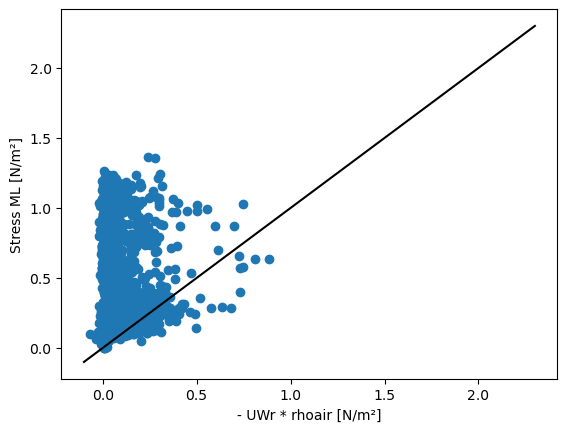

In [113]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# Best model

In [30]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [31]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [32]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-01 10:53:01.552309: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-01 10:53:01.553193: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-01 10:53:01.553203: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-01 10:53:01.553222: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-1l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-01 10:53:01.553684: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
12/12 [==============================] - 2s 97ms/step - loss: 12.3879 - mean_absolute_error: 2.3733 - val_loss: 1.2784 - val_mean_absolute_error: 0.6632
Epoch 2/500
12/12 [==============================] - 0s 34ms/step - loss: 1.4684 - mean_absolute_error: 0.9289 - val_loss: 1.3014 - val_mean_absolute_error: 0.7426
Epoch 3/500
12/12 [==============================] - 0s 34ms/step - loss: 0.9495 - mean_absolute_error: 0.7253 - val_loss: 1.2628 - val_mean_absolute_error: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 37ms/step - loss: 0.7266 - mean_absolute_error: 0.6513 - val_loss: 1.2813 - val_mean_absolute_error: 0.7138
Epoch 5/500
12/12 [==============================] - 0s 34ms/step - loss: 0.6662 - mean_absolute_error: 0.6238 - val_loss: 1.3287 - val_mean_absolute_error: 0.7101
Epoch 6/500
12/12 [==============================] - 0s 33ms/step - loss: 0.6460 - mean_absolute_error: 0.5855 - val_loss: 1.5263 - val_mean_absolute_error: 0.6830
Epoch 7/500
12/

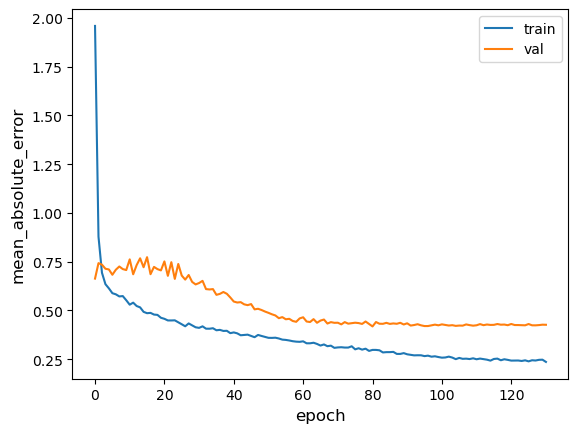

59/59 [==============================] - 0s 2ms/step - loss: 0.2412 - mean_absolute_error: 0.3405
Test accuracy 0.3404705822467804
Test loss 0.24115237593650818


In [33]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [34]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [35]:
rmse(y_test.values, y_test_pred)

0.1648514588002305

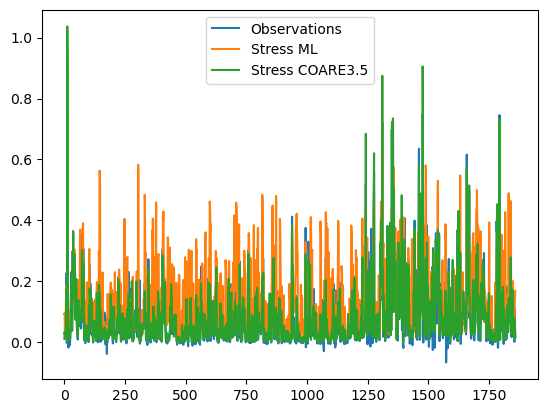

In [36]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

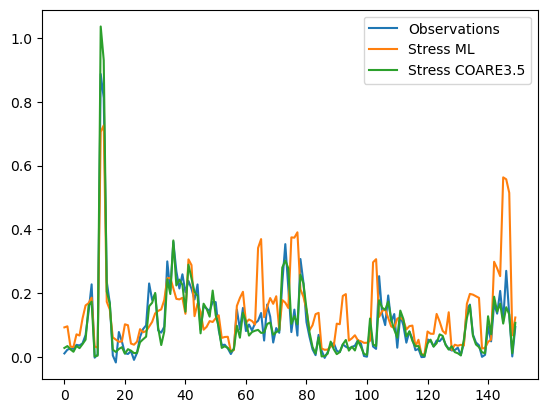

In [37]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [38]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50336438],
       [0.50336438, 1.        ]])

In [39]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

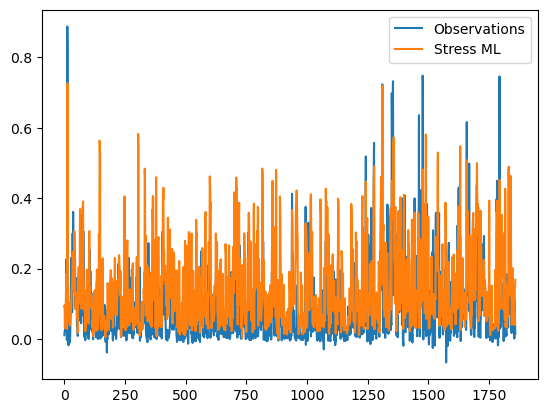

In [40]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.1648514588002305

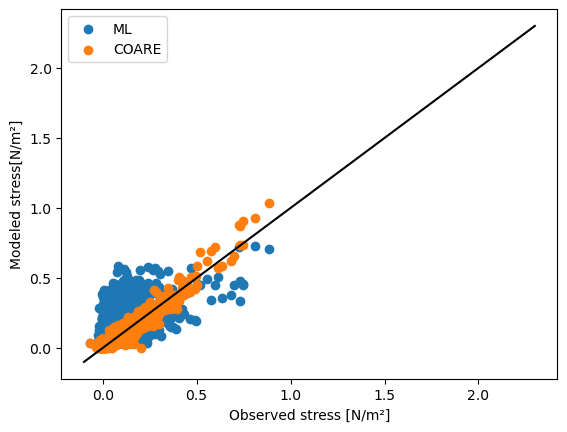

In [43]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

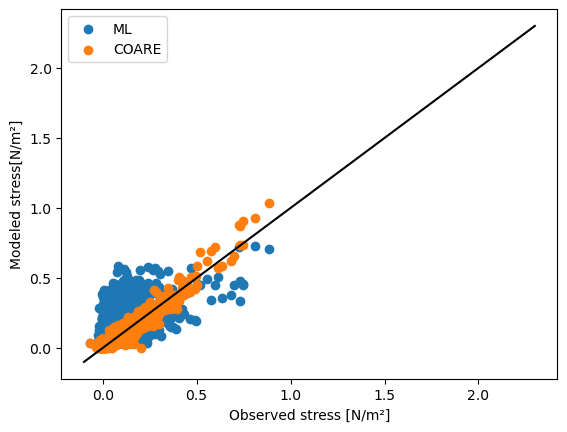

In [44]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [45]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [46]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [47]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 142ms/step - loss: 11.8016 - mean_absolute_error: 2.3879 - val_loss: 1.4143 - val_mean_absolute_error: 0.6683
Epoch 2/500
6/6 [==============================] - 1s 110ms/step - loss: 1.7541 - mean_absolute_error: 0.9783 - val_loss: 1.6487 - val_mean_absolute_error: 0.6669
Epoch 3/500
6/6 [==============================] - 1s 111ms/step - loss: 1.5829 - mean_absolute_error: 0.8052 - val_loss: 1.2366 - val_mean_absolute_error: 0.6759
Epoch 4/500
6/6 [==============================] - 1s 110ms/step - loss: 0.9124 - mean_absolute_error: 0.7294 - val_loss: 1.3063 - val_mean_absolute_error: 0.6865
Epoch 5/500
6/6 [==============================] - 1s 116ms/step - loss: 0.7681 - mean_absolute_error: 0.6622 - val_loss: 1.4638 - val_mean_absolute_error: 0.6823
Epoch 6/500
6/6 [==============================] - 1s 110ms/step - loss: 0.7665 - mean_absolute_error: 0.6305 - val_loss: 1.4236 - val_mean_absolute_error: 0.7099
Epoch 7/500
6/6 [====

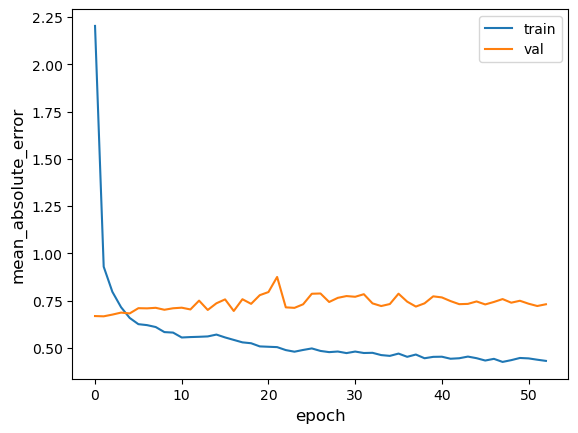

59/59 [==============================] - 0s 7ms/step - loss: 0.1764 - mean_absolute_error: 0.2478
Test accuracy 0.2478337436914444
Test loss 0.17643295228481293


In [48]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [49]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [50]:
rmse(y_test.values, y_test_pred)

0.11000706694520276

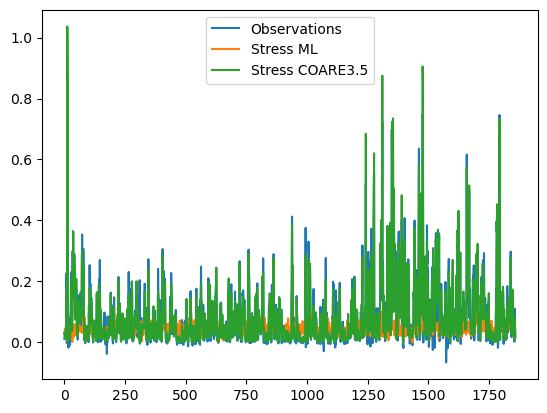

In [51]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

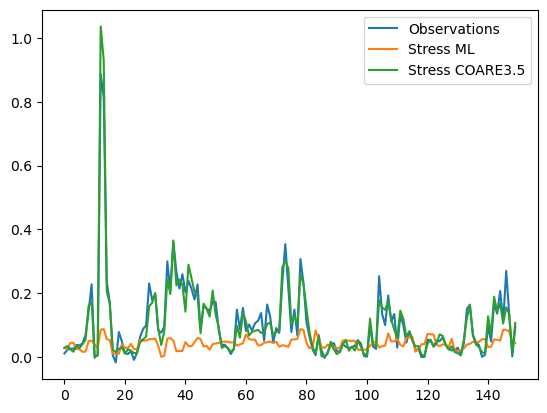

In [52]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [53]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.25382111],
       [0.25382111, 1.        ]])

In [54]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

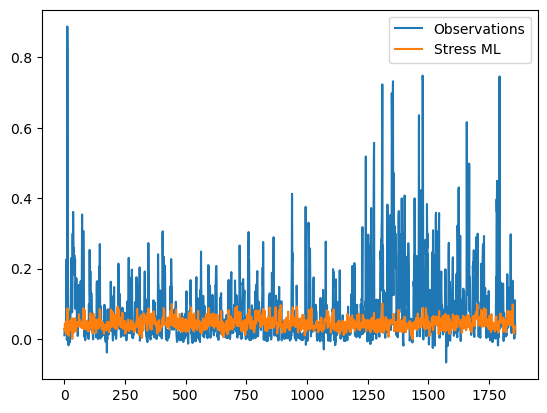

In [55]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [56]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [57]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.11000706694520276

Text(0, 0.5, 'Stress ML [N/m²]')

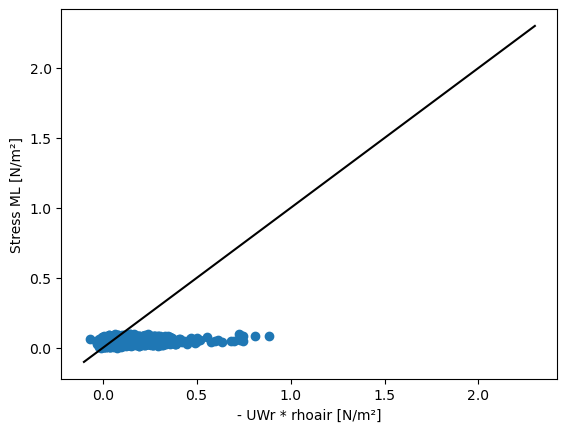

In [58]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [59]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [60]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [61]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 664ms/step - loss: 25.7807 - mean_absolute_error: 3.0762 - val_loss: 1.3252 - val_mean_absolute_error: 0.7759
Epoch 2/1000
3/3 [==============================] - 2s 583ms/step - loss: 3.6721 - mean_absolute_error: 1.4762 - val_loss: 2.3686 - val_mean_absolute_error: 0.6730
Epoch 3/1000
3/3 [==============================] - 2s 582ms/step - loss: 2.3287 - mean_absolute_error: 1.0968 - val_loss: 1.2574 - val_mean_absolute_error: 0.5777
Epoch 4/1000
3/3 [==============================] - 2s 581ms/step - loss: 1.5071 - mean_absolute_error: 0.9062 - val_loss: 2.3179 - val_mean_absolute_error: 1.2391
Epoch 5/1000
3/3 [==============================] - 2s 588ms/step - loss: 1.4096 - mean_absolute_error: 0.8769 - val_loss: 7.7509 - val_mean_absolute_error: 2.5035
Epoch 6/1000
3/3 [==============================] - 2s 584ms/step - loss: 1.2781 - mean_absolute_error: 0.8454 - val_loss: 11.5711 - val_mean_absolute_error: 3.1992
Epoch 7/1000
3

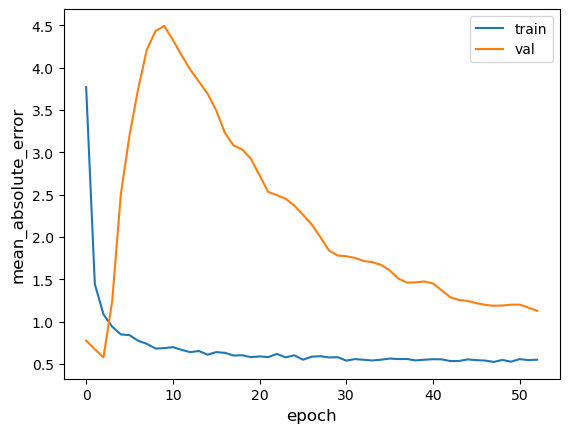

59/59 [==============================] - 1s 25ms/step - loss: 0.5201 - mean_absolute_error: 0.6020
Test accuracy 0.6019957065582275
Test loss 0.5200952291488647


In [62]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [63]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [64]:
rmse(y_test.values, y_test_pred)

0.18323354276950518

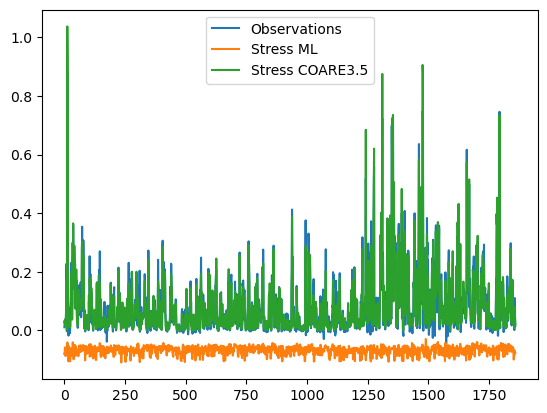

In [65]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

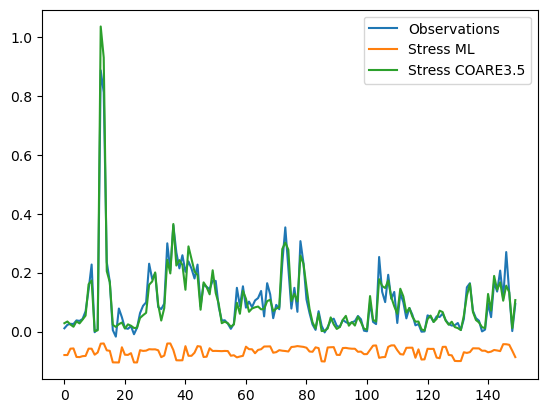

In [66]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [67]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15092629],
       [0.15092629, 1.        ]])

In [68]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

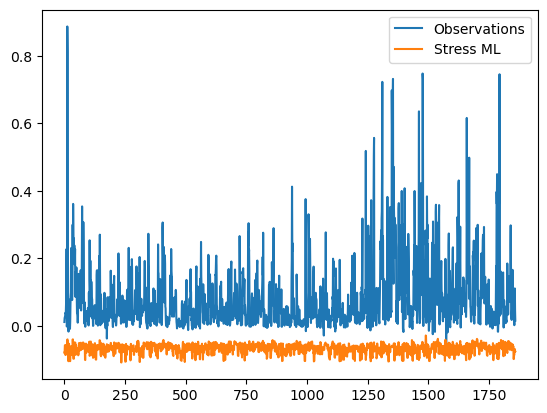

In [69]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [70]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [71]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.18323354276950518

Text(0, 0.5, 'Stress ML [N/m²]')

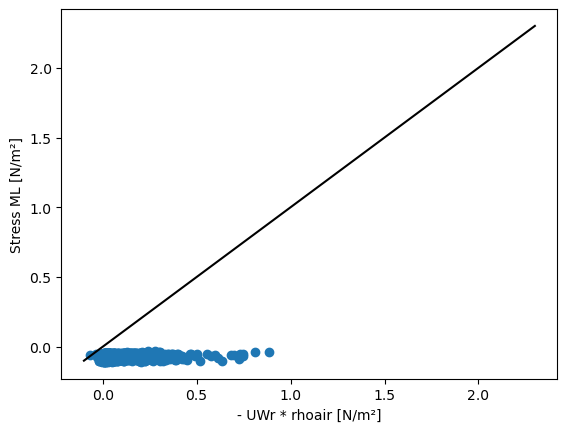

In [72]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [73]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [74]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [75]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 605ms/step - loss: 18.6527 - mean_absolute_error: 2.9843 - val_loss: 1.4405 - val_mean_absolute_error: 0.7542
Epoch 2/1000
3/3 [==============================] - 2s 549ms/step - loss: 3.9930 - mean_absolute_error: 1.5512 - val_loss: 1.2675 - val_mean_absolute_error: 0.7511
Epoch 3/1000
3/3 [==============================] - 2s 554ms/step - loss: 1.8428 - mean_absolute_error: 1.0765 - val_loss: 1.2376 - val_mean_absolute_error: 0.5985
Epoch 4/1000
3/3 [==============================] - 2s 554ms/step - loss: 1.3630 - mean_absolute_error: 0.9096 - val_loss: 2.6644 - val_mean_absolute_error: 1.0705
Epoch 5/1000
3/3 [==============================] - 2s 549ms/step - loss: 1.1825 - mean_absolute_error: 0.8456 - val_loss: 4.0060 - val_mean_absolute_error: 1.6119
Epoch 6/1000
3/3 [==============================] - 2s 549ms/step - loss: 1.0566 - mean_absolute_error: 0.7702 - val_loss: 6.7853 - val_mean_absolute_error: 2.2688
Epoch 7/1000
3/

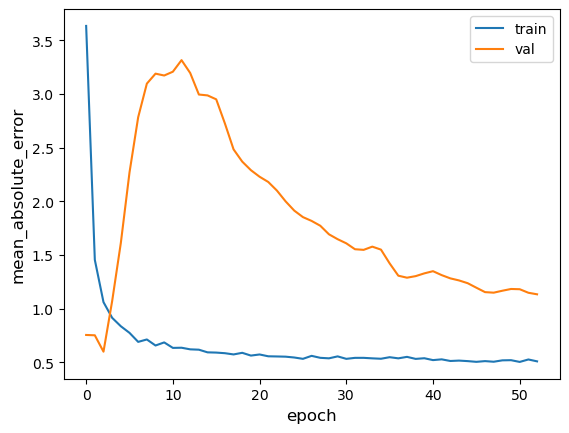

59/59 [==============================] - 1s 25ms/step - loss: 0.5266 - mean_absolute_error: 0.6038
Test accuracy 0.6038045883178711
Test loss 0.5266402363777161


In [76]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [77]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [78]:
rmse(y_test.values, y_test_pred)

0.18419618245606403

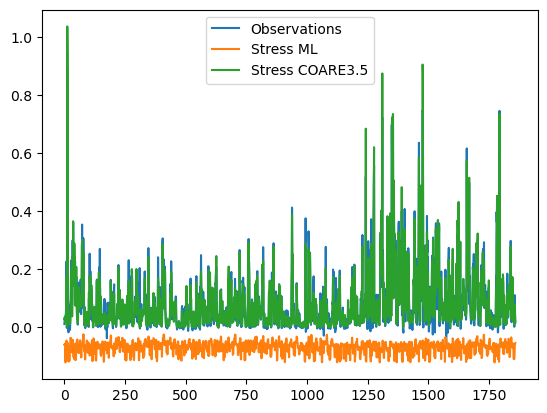

In [79]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

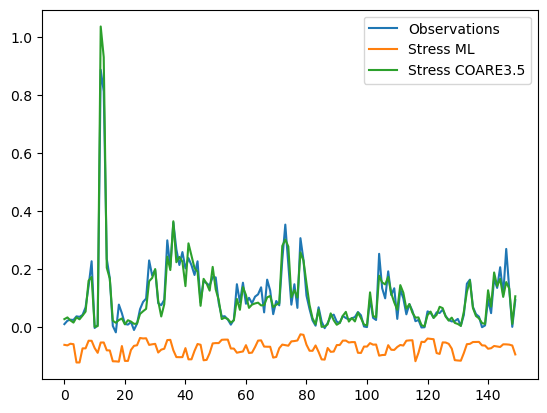

In [80]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [81]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.09185126],
       [0.09185126, 1.        ]])

In [82]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

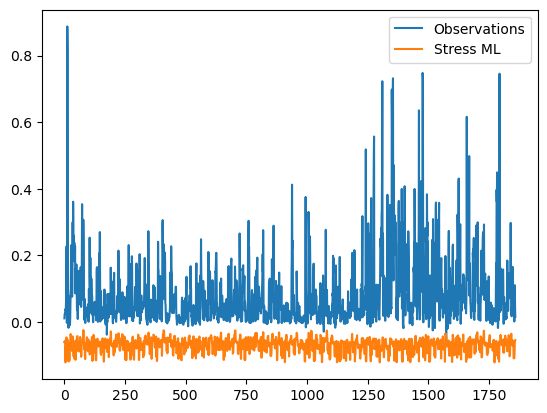

In [83]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [84]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [85]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.18419618245606403

Text(0, 0.5, 'Stress ML [N/m²]')

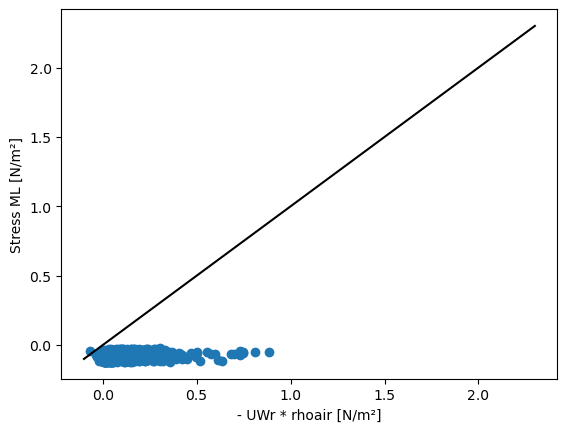

In [86]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [87]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [88]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [89]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 627ms/step - loss: 19.3261 - mean_absolute_error: 2.6227 - val_loss: 1.3878 - val_mean_absolute_error: 0.7620
Epoch 2/1000
3/3 [==============================] - 2s 541ms/step - loss: 2.9368 - mean_absolute_error: 1.3871 - val_loss: 1.6476 - val_mean_absolute_error: 0.6863
Epoch 3/1000
3/3 [==============================] - 2s 556ms/step - loss: 2.1689 - mean_absolute_error: 0.9755 - val_loss: 1.4148 - val_mean_absolute_error: 0.6174
Epoch 4/1000
3/3 [==============================] - 2s 556ms/step - loss: 1.1516 - mean_absolute_error: 0.8153 - val_loss: 2.8428 - val_mean_absolute_error: 0.8033
Epoch 5/1000
3/3 [==============================] - 2s 540ms/step - loss: 1.1960 - mean_absolute_error: 0.7827 - val_loss: 2.8357 - val_mean_absolute_error: 1.1539
Epoch 6/1000
3/3 [==============================] - 2s 553ms/step - loss: 1.0114 - mean_absolute_error: 0.7270 - val_loss: 3.6821 - val_mean_absolute_error: 1.5804
Epoch 7/1000
3/

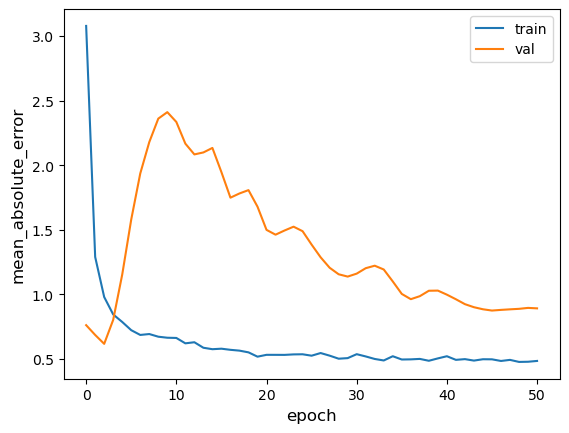

59/59 [==============================] - 1s 25ms/step - loss: 6.7638 - mean_absolute_error: 2.4449
Test accuracy 2.444925546646118
Test loss 6.763845443725586


In [90]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [91]:
y_test_pred = multi_dense_model.predict(x_test)

In [92]:
rmse(y_test.values, y_test_pred)

2.599378877263621

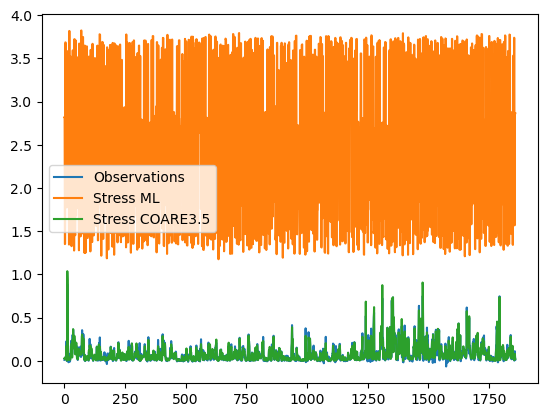

In [93]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

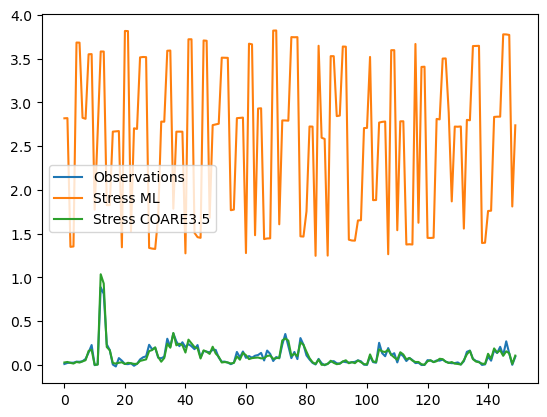

In [94]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [95]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.       , -0.0398312],
       [-0.0398312,  1.       ]])

In [96]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

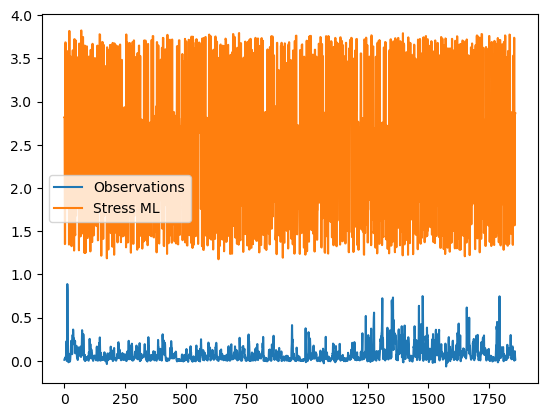

In [97]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [98]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [99]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

2.599378877263621

Text(0, 0.5, 'Stress ML [N/m²]')

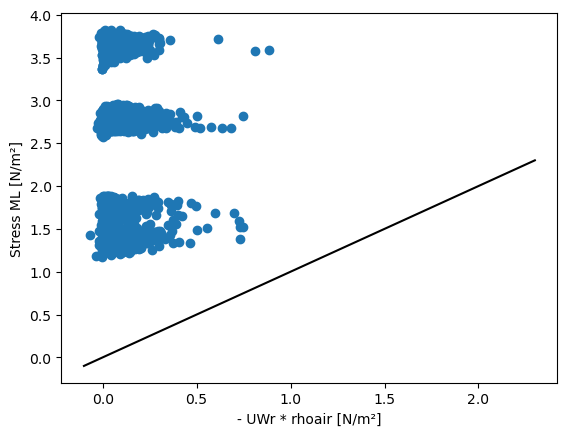

In [100]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 